In [1]:
# 데이터 불러오기
import pandas as pd  # 데이터 처리 라이브러리
train_data = pd.read_csv("train.csv") # 훈련 데이터
test_data = pd.read_csv("test.csv") # 테스트 데이터
store_data = pd.read_csv("stores.csv") # 매장정보 데이터
oil_data = pd.read_csv("oil.csv") # 유가 데이터
holiday_data = pd.read_csv("holidays_events.csv") # 공휴일 데이터
transaction_data = pd.read_csv("transactions.csv").sort_values(["store_nbr", "date"]) # store_nbr, date 기준으로 정렬
# object타입을 datetime 형식으로 바꾸기
train_data["date"] = pd.to_datetime(train_data.date)
test_data["date"] = pd.to_datetime(test_data.date)
transaction_data["date"] = pd.to_datetime(transaction_data.date)

# 데이터 타입 변환
train_data.onpromotion = train_data.onpromotion.astype("float16")
train_data.sales = train_data.sales.astype("float32")
store_data.cluster = store_data.cluster.astype("int8")

train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [2]:
# 전처리 : 날짜를 dt로 포맷하고 인덱스로 사용, id 컬럼 삭제한 함수
process_train = train_data.copy()

del train_data

process_train['date'] = pd.to_datetime(process_train['date'])
process_train = process_train.set_index('date')
process_train = process_train.drop('id',axis = 1)
process_train[['store_nbr','family']].astype('category') # 램 사용량 줄이려고
process_train

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000000,0.0
2013-01-01,1,BABY CARE,0.000000,0.0
2013-01-01,1,BEAUTY,0.000000,0.0
2013-01-01,1,BEVERAGES,0.000000,0.0
2013-01-01,1,BOOKS,0.000000,0.0
...,...,...,...,...
2017-08-15,9,POULTRY,438.132996,0.0
2017-08-15,9,PREPARED FOODS,154.552994,1.0
2017-08-15,9,PRODUCE,2419.729004,148.0


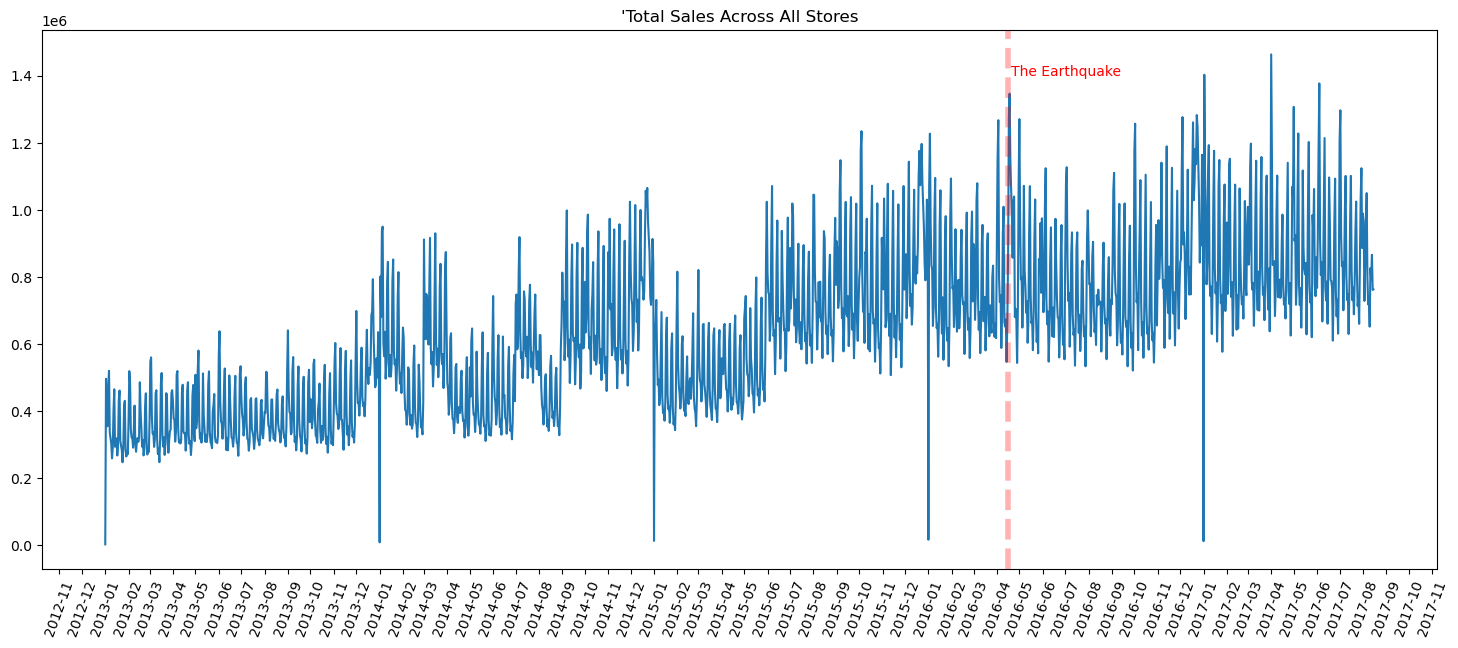

In [8]:
##### 지진과 매출 관계 분석 #####
# 일일 총 매출에 지진 표시
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 7))
ax.set(title="'Total Sales Across All Stores")
total_sales = process_train.sales.groupby("date").sum()
plt.plot(total_sales)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=70)
plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')


plt.show()

In [4]:
# 각 스토어의 일일 총 판매량 딕셔너리로 만들기
daily_sale_dict = {}
for i in process_train.store_nbr.unique():
    daily_sale = process_train[process_train['store_nbr']==i]
    daily_sale_dict[i] = daily_sale

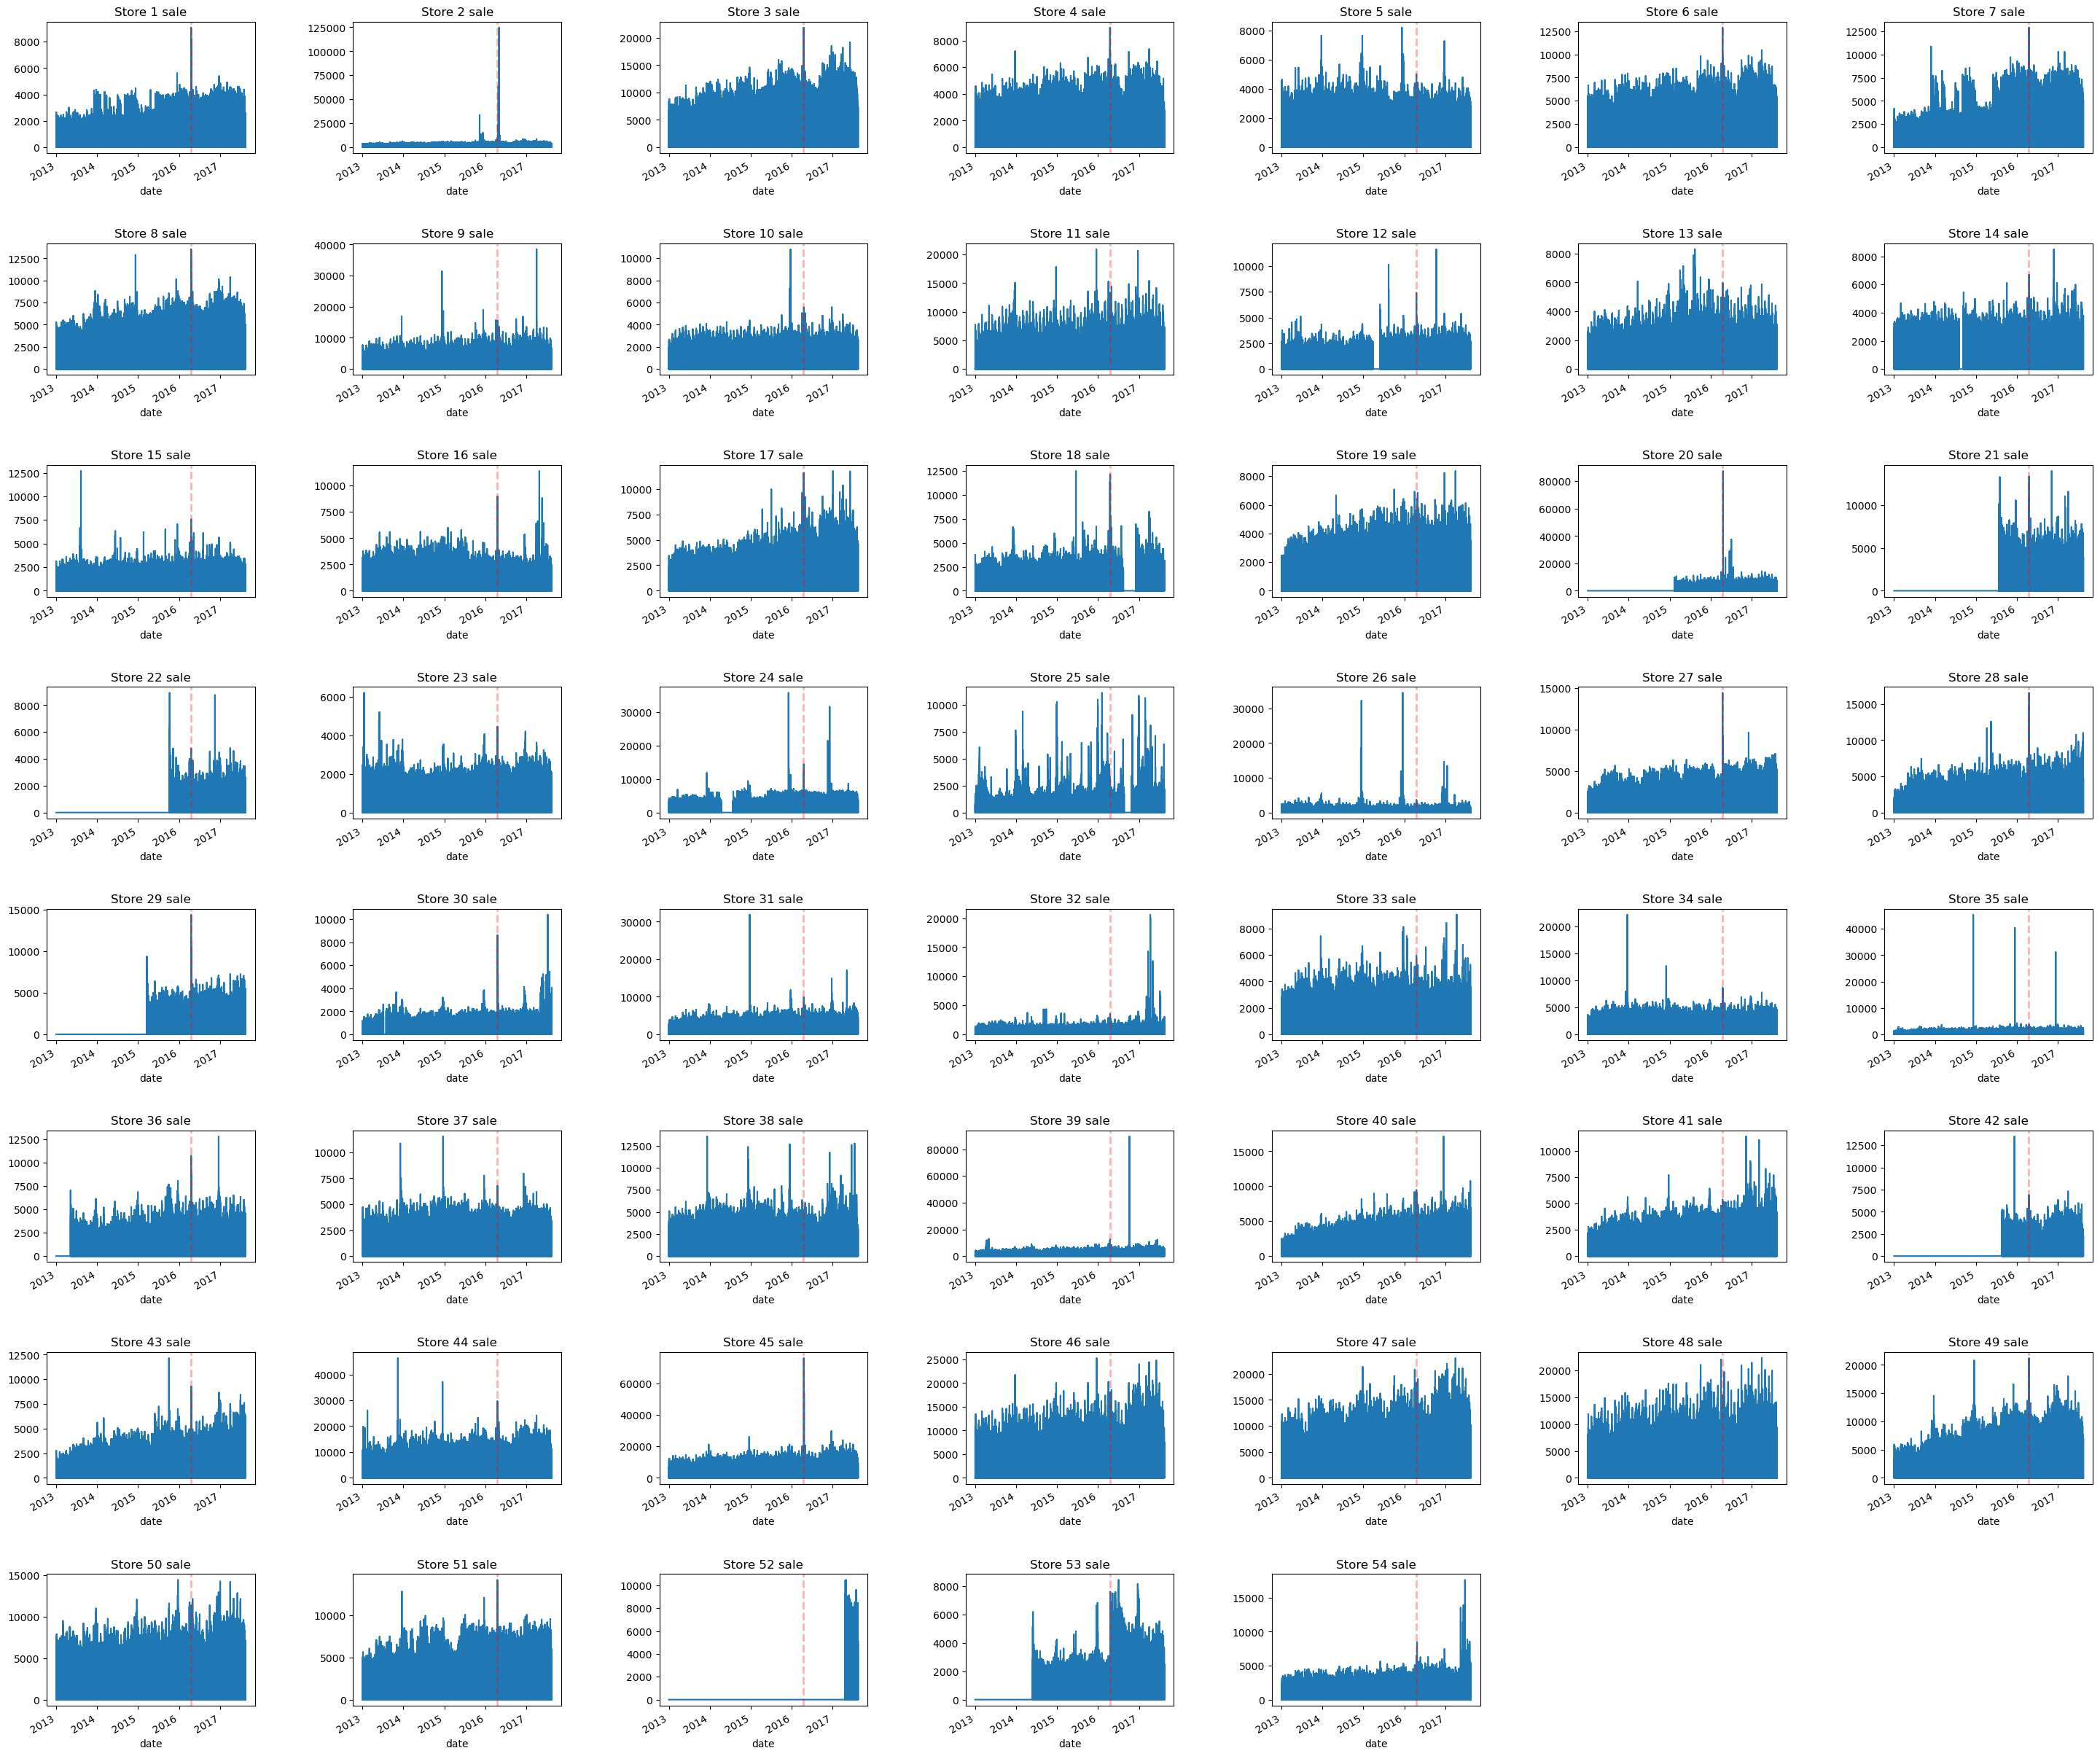

In [5]:
# 위의 결과를 시각화하는데 지진 표시되게 함
fig = plt.figure(figsize=(30,30))
for i in daily_sale_dict.keys():
    plt.subplot(8,7,i)
    plt.title('Store {} sale'.format(i))
    plt.tight_layout(pad=5)
    sale = daily_sale_dict[i].sales
    sale.plot()
    plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=2,alpha=0.3) #mark the earthquake

In [6]:
# 제품군별 매출 딕셔너리로 만들기
by_fam_dic = {}
fam_list = process_train.family.unique()

for fam in fam_list:
    by_fam_dic[fam] = process_train[process_train['family']==fam].sales

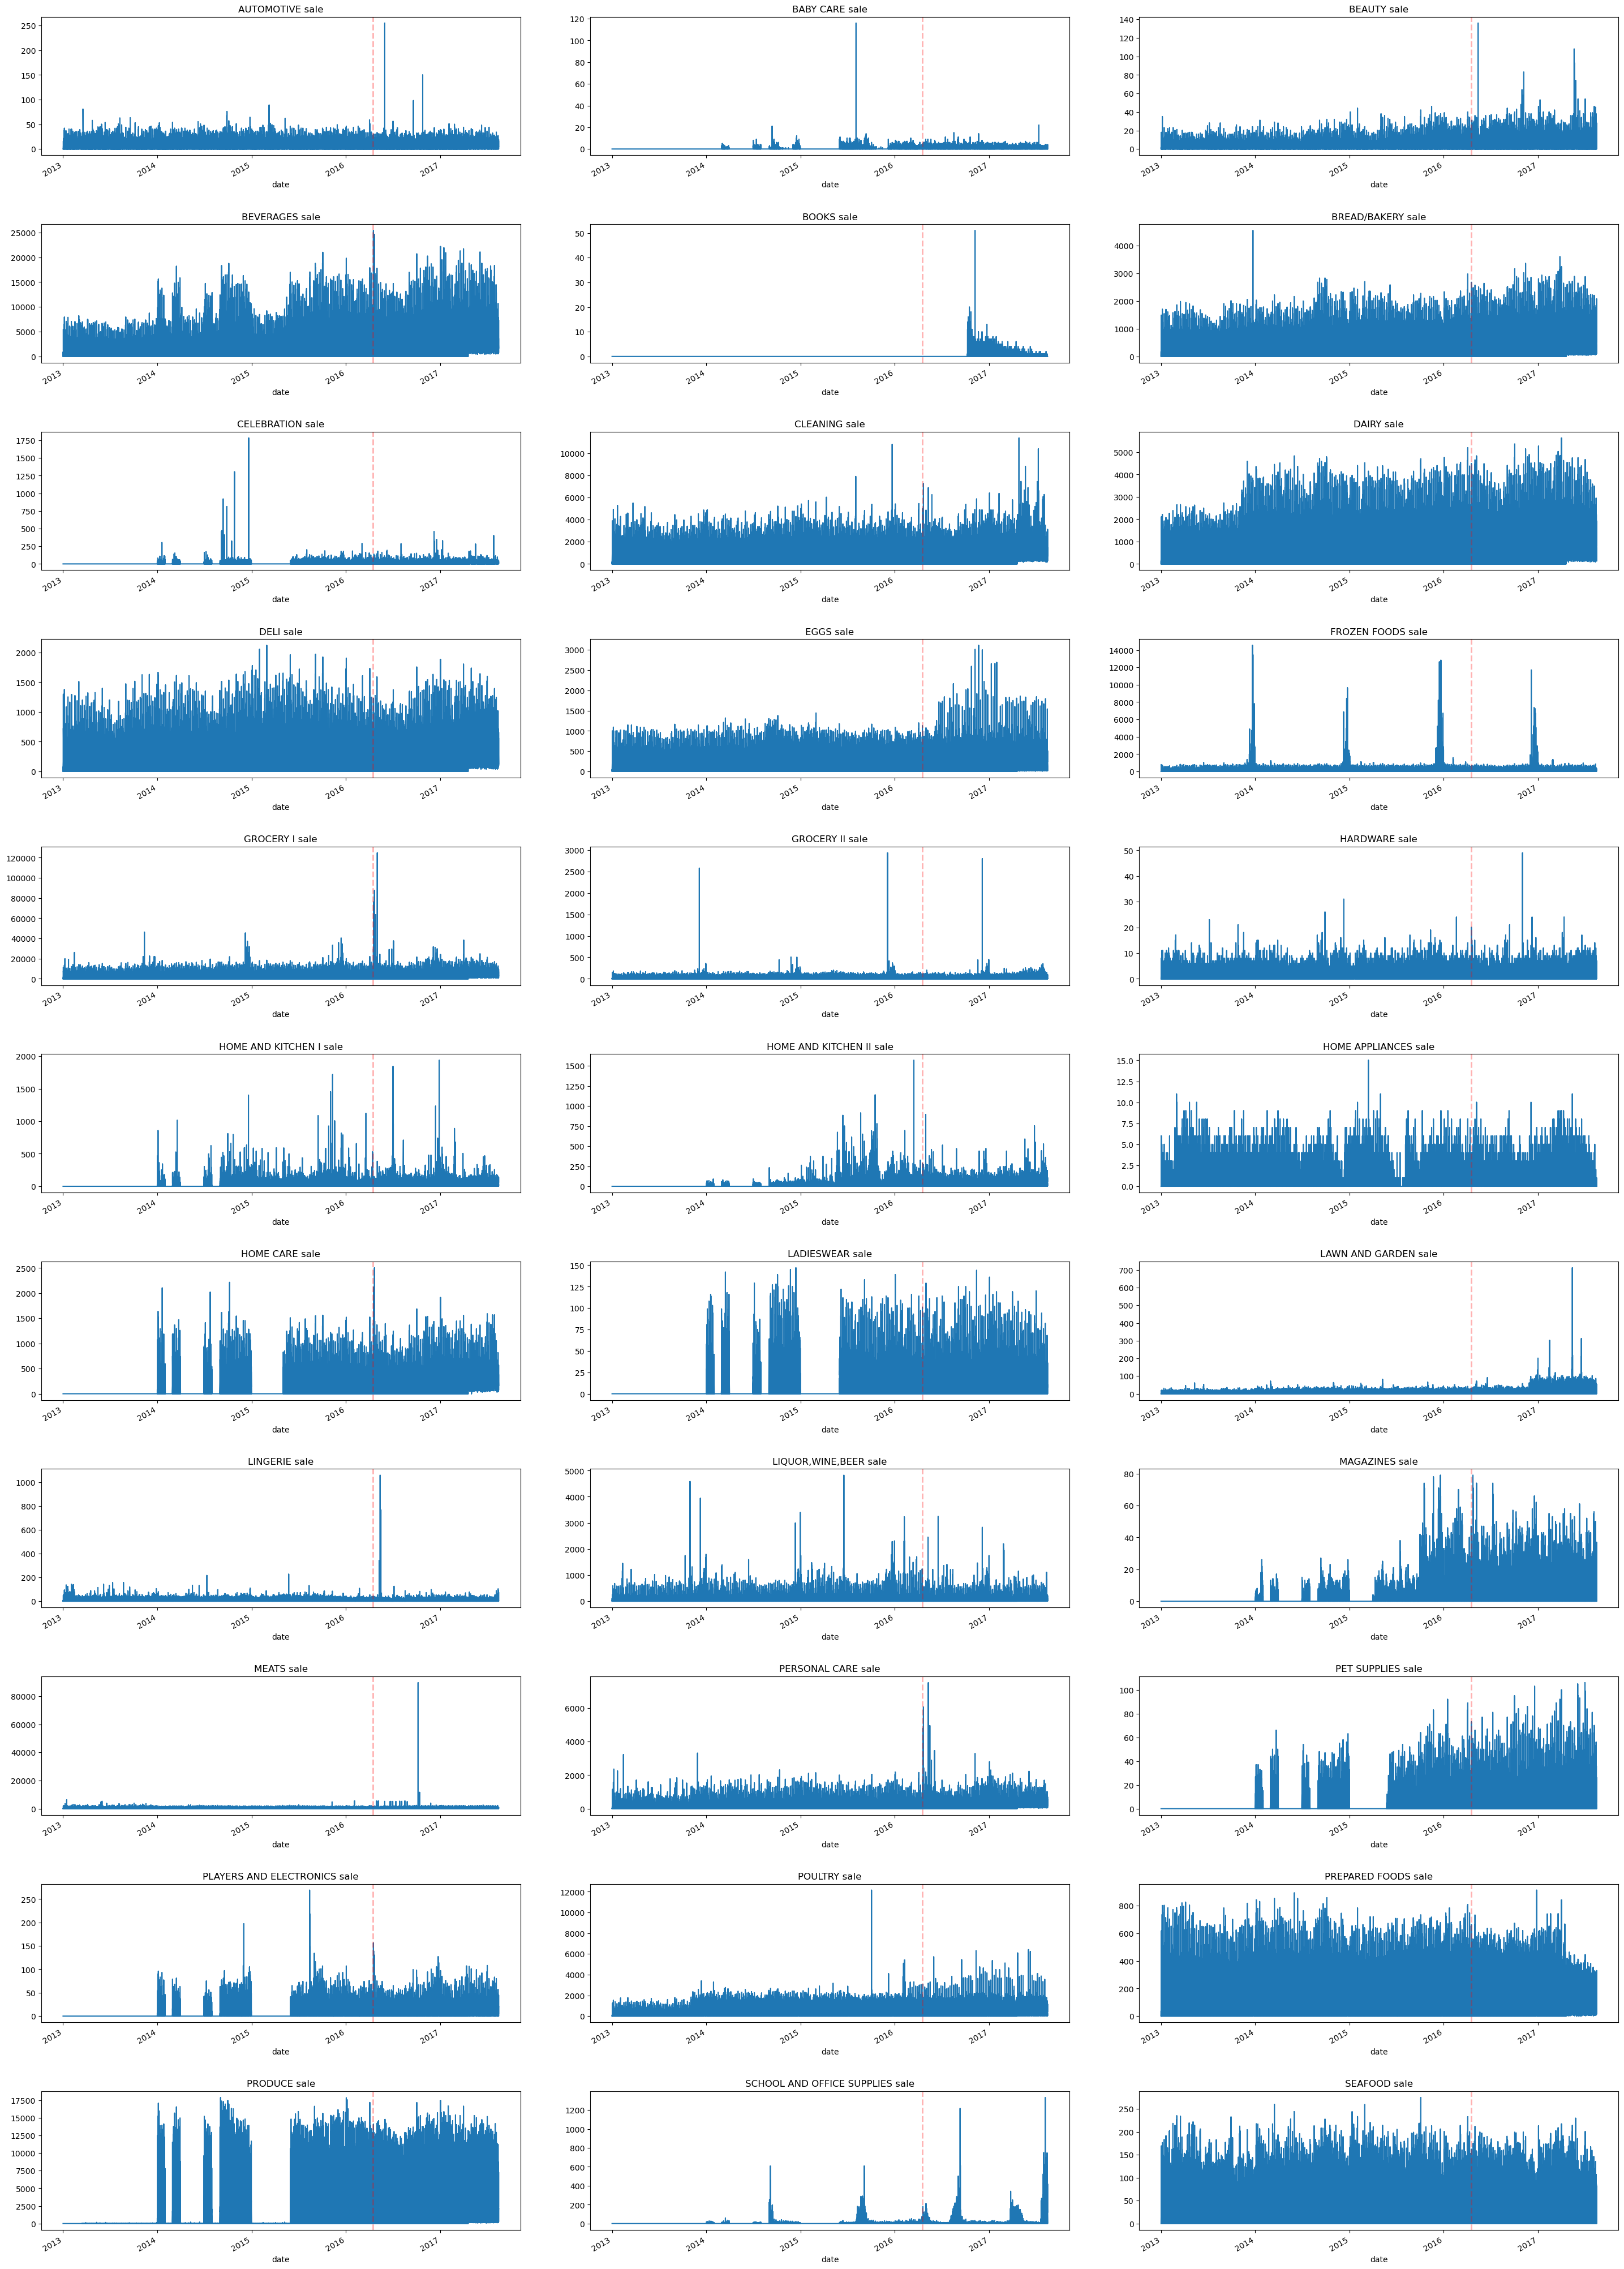

In [7]:
# 위의 결과를 시각화하는데 지진 표시되게 함
fig = plt.figure(figsize=(30,50))

for i,fam in enumerate(by_fam_dic.keys()):
    plt.subplot(11,3,i+1)
    plt.title('{} sale'.format(fam))
    plt.tight_layout(pad=5)
    sale = by_fam_dic[fam]
    sale.plot()
    plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=2,alpha=0.3) #mark the earthquake